# Fake News Detection Model

IMPORTING THE LIBRARIES

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string

IMPORTING AND TRANSFORMINGTHE DATASETS

In [4]:
data_fake = pd.read_csv(r'C:\Users\mamta\Desktop\DESKTOP MAMTA\Bsc Projects\ml projects\Fake.csv')
data_true = pd.read_csv(r'C:\Users\mamta\Desktop\DESKTOP MAMTA\Bsc Projects\ml projects\True.csv')
data_fake.head(2)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"


In [5]:
data_true.head(2)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"


In [6]:
data_fake["class"] = 0
data_true["class"] = 1

In [7]:
data_fake.shape,data_true.shape

((23481, 5), (21417, 5))

In [8]:
data_fake_testing = data_fake.tail(10)
data_fake_training = data_fake.iloc[:23471,:]
data_true_testing = data_true.tail(10)
data_true_training = data_true.iloc[:21407,:]
data_fake_testing.shape,data_fake_training.shape,data_true_testing.shape,data_true_training.shape

((10, 5), (23471, 5), (10, 5), (21407, 5))

In [9]:
data_fake_testing.head(2)

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0


In [10]:
data_true_testing.head(2)

,title,text,subject,date,class
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1


In [11]:
data_merge = pd.concat([data_fake_training, data_true_training], axis = 0)
data_merge.tail(2)

,title,text,subject,date,class
21405,Trump talks tough on Pakistan's 'terrorist' ha...,ISLAMABAD (Reuters) - Outlining a new strategy...,worldnews,"August 22, 2017",1
21406,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1


In [12]:
data = data_merge.drop(['title','subject','date'], axis =1)

In [13]:
data.isnull().sum()

text     0
class    0
dtype: int64

In [14]:
data.isna().sum()

text     0
class    0
dtype: int64

In [15]:
data = data.sample(frac = 1)

In [16]:
data.head(5)

,text,class
7067,Elizabeth Warren is a strong advocate for just...,0
16218,,0
20358,ISTANBUL (Reuters) - Turkey issued arrest warr...,1
15756,ABIDJAN (Reuters) - Protesters clashed with po...,1
15612,SYDNEY (Reuters) - Australian Prime Minister M...,1


In [17]:
data.reset_index(inplace=True)
data.drop(['index'], axis =1, inplace = True)

In [18]:
data.columns

Index(['text', 'class'], dtype='object')

In [19]:
data.head(5)

,text,class
0,Elizabeth Warren is a strong advocate for just...,0
1,,0
2,ISTANBUL (Reuters) - Turkey issued arrest warr...,1
3,ABIDJAN (Reuters) - Protesters clashed with po...,1
4,SYDNEY (Reuters) - Australian Prime Minister M...,1


In [20]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]','',text)
    text = re.sub("\\W"," ",text)
    text = re.sub('https?://\S+|www\.\S+','',text)
    text = re.sub('<.*?>+','',text)
    text = re.sub('[%s]' % re.escape(string.punctuation),'',text)
    text = re.sub('\n', '',text)
    text = re.sub('\w*\d\w*','',text)
    return text

In [21]:
data['text'] = data['text'].apply(wordopt)

In [22]:
x = data['text']
y = data['class']

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25)

USING SVM TO VECTORIZE THE DATA

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

APPLYING MULTINOMIAL NAIVE BAYES

In [25]:
from sklearn.naive_bayes import MultinomialNB

NB = MultinomialNB()
NB.fit(xv_train,y_train)
pred_nb = NB.predict(xv_test)

In [26]:
NB.score(xv_test,y_test)

0.9362745098039216

In [27]:
print(classification_report(y_test, pred_nb))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      5890
           1       0.94      0.92      0.93      5330

    accuracy                           0.94     11220
   macro avg       0.94      0.94      0.94     11220
weighted avg       0.94      0.94      0.94     11220



APPLYING BOOSTING WITH MULTINOMIAL NAIVE BAYES TO IMPROVE ACCURACY

In [58]:
from sklearn.ensemble import AdaBoostClassifier
nb = MultinomialNB()
model = AdaBoostClassifier(estimator = nb, n_estimators = 2000)
model.fit(xv_train,y_train)

AdaBoostClassifier(estimator=MultinomialNB(), n_estimators=2000)

In [59]:
pred_nbb = model.predict(xv_test)

In [60]:
model.score(xv_test,y_test)

0.9815508021390374

Text(0.5, 26.222222222222207, 'Predicted label')

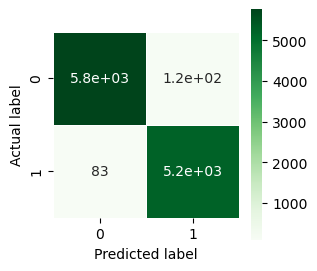

In [61]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
plt.figure(figsize = (3,3))
sns.heatmap(confusion_matrix(y_test,pred_nbb),annot = True,linewidths = 0.5,square = True,cmap = 'Greens')
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

In [62]:
print(classification_report(y_test, pred_nbb))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      5890
           1       0.98      0.98      0.98      5330

    accuracy                           0.98     11220
   macro avg       0.98      0.98      0.98     11220
weighted avg       0.98      0.98      0.98     11220



In [63]:
def output_label(n):
    if n==0:
        return "Fake News"
    elif n==1:
        return "Not a Fake News"
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt)
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_nbb = model.predict(new_xv_test)
    return print("\n\n Final Prediction: {}".format(output_label(pred_nb[0])))

FINAL TESTING

In [64]:
news = str(input())
manual_testing(news)

A one month old, Bangalore based company gets unicorn title in one night.


 Final Prediction: Not a Fake News


In [65]:
news = str(input())
manual_testing(news)

Budget 2023 was announced in February 2023


 Final Prediction: Not a Fake News
